In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### import data

In [2]:
# the dataset is a simulation of real time ads data
# it shows which ad each person would click (1) or not click (0)
df = pd.read_csv('../data/Ads_CTR_Optimisation.csv')

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


##### thompson sampling algorithm

> the goal is to maximize the cumulative reward while also finding the best ad in as few rounds as possible

<img src="../data/images/thompson_sampling.png" width="400">

In [4]:
import random

N = 10000 # no. of rounds
D = 10 # Ads

ads_selected = []
num_of_rewards_1 = [0] * D
num_of_rewards_0 = [0] * D

total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0

    for d in range(0, D):
        random_draw = random.betavariate(num_of_rewards_1[d] + 1, num_of_rewards_0[d] + 1) # random draw from beta distribution of ad 'd'

        if (random_draw > max_random):
            ad = d
            max_random = random_draw

    ads_selected.append(ad)
    reward = df.values[n, ad]
    
    if reward:
        num_of_rewards_1[ad] += 1

    else:
        num_of_rewards_0[ad] += 1

    total_reward += reward

In [5]:
print('total reward:', total_reward)

total reward: 2604


##### visualize the results

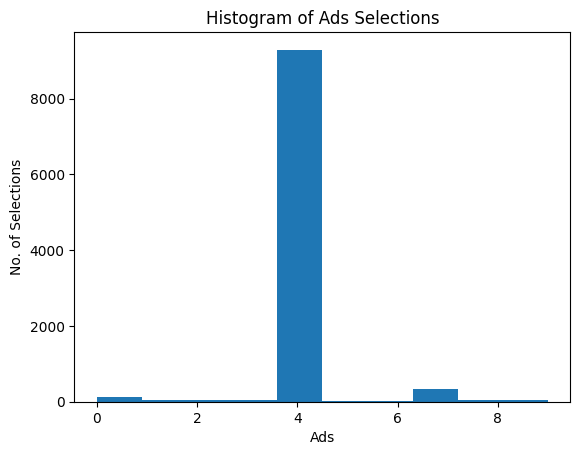

In [6]:
plt.hist(ads_selected)

plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('No. of Selections')
plt.show()

> even with N <= 500, thompson sampling performs better than ucb algorithm (verified using hit and run)

> thompson sampling often outperforms ucb algorithm